# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How many of the loan applicants have dependents based on the historical dataset?

5. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

6. Are applicants with a credit history more likely to default than those who do not have one?

7. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [20]:
%pip install sweetviz 
#uncomment the above if you need to install the library 
%pip install auto-sklearn
#uncomment the above if you need to install the library 

Note: you may need to restart the kernel to use updated packages.
  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "c:\Users\kh\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\kh\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\kh\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\kh\AppData\Local\Temp\pip-build-env-805a4xg0\overlay\Lib\

In [21]:
%pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [23]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import Datasets

In [2]:
train_data = pd.read_csv('C:/Users/kh/Downloads/Standard Bank/train.csv')
test_data = pd.read_csv('C:/Users/kh/Downloads/Standard Bank/test.csv')

In [3]:
# Display the first few rows of the datasets to get a preview
print("Train Dataset:")
train_data.head()

Train Dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print("\nTest Dataset:")
test_data.head()


Test Dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Part One

## EDA

In [5]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
# we concat for easy analysis
n = train_data.shape[0] # we set this to be able to separate the
df = pd.concat([train_data, test_data], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# Summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       981.000000         981.000000  954.000000        961.000000   
mean       5179.795107        1601.916330  142.511530        342.201873   
std        5695.104533        2718.772806   77.421743         65.100602   
min           0.000000           0.000000    9.000000          6.000000   
25%        2875.000000           0.000000  100.000000        360.000000   
50%        3800.000000        1110.000000  126.000000        360.000000   
75%        5516.000000        2365.000000  162.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      902.000000  
mean         0.835920  
std          0.370553  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [9]:
# Data types and missing values
data_info = df.info()
print("\nData Info:")
print(data_info)


<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB

Data Info:
None


### Data Preparation

In [10]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [11]:
# Impute missing gender values with the mode (most frequent value)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
#  Impute missing married status with the mode
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
#  Impute missing dependents with 0 (assuming no dependents)
df['Dependents'].fillna('0', inplace=True)
#  Impute missing self-employed values with the mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
# Impute missing loan amounts with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
# Impute missing loan terms with the median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
# Impute missing 'Credit_History' values with 0
df['Credit_History'].fillna(0, inplace=True)


In [12]:
df['Loan_Status']

0        Y
1        N
2        Y
3        Y
4        Y
      ... 
362    NaN
363    NaN
364    NaN
365    NaN
366    NaN
Name: Loan_Status, Length: 981, dtype: object

In [13]:
df.dropna(subset=['Loan_Status'], inplace=True)


In [14]:
# recheck our data
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# set data after cleaning
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


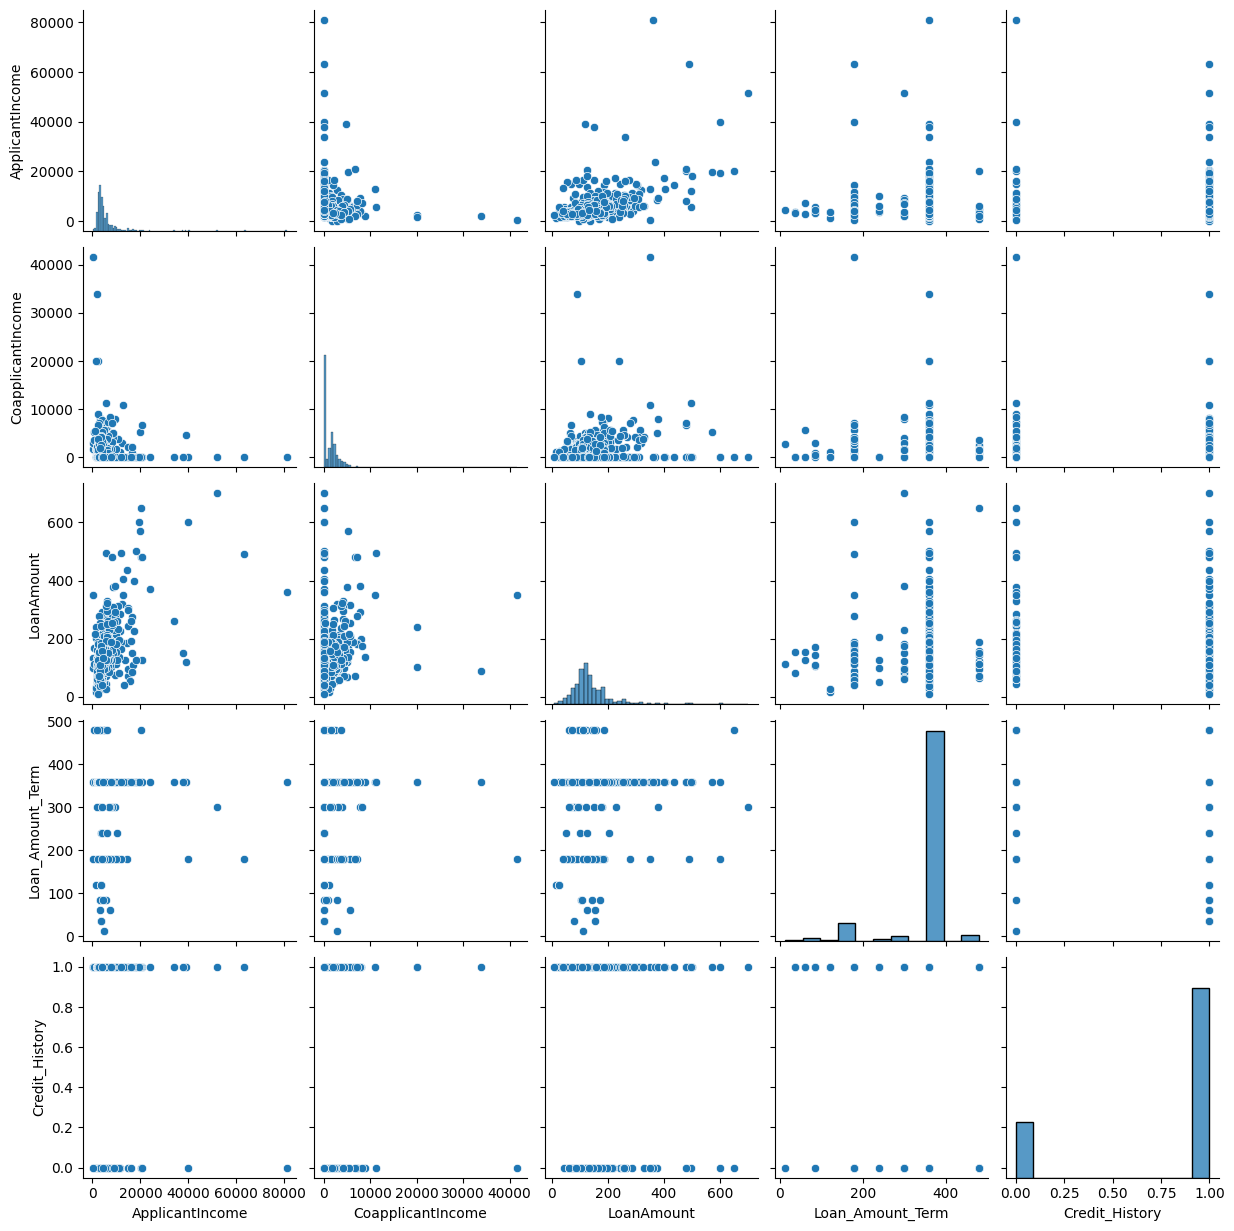

In [16]:
# Creating  informative and attractive statistical graphics
import seaborn as sns
sns.pairplot(df)


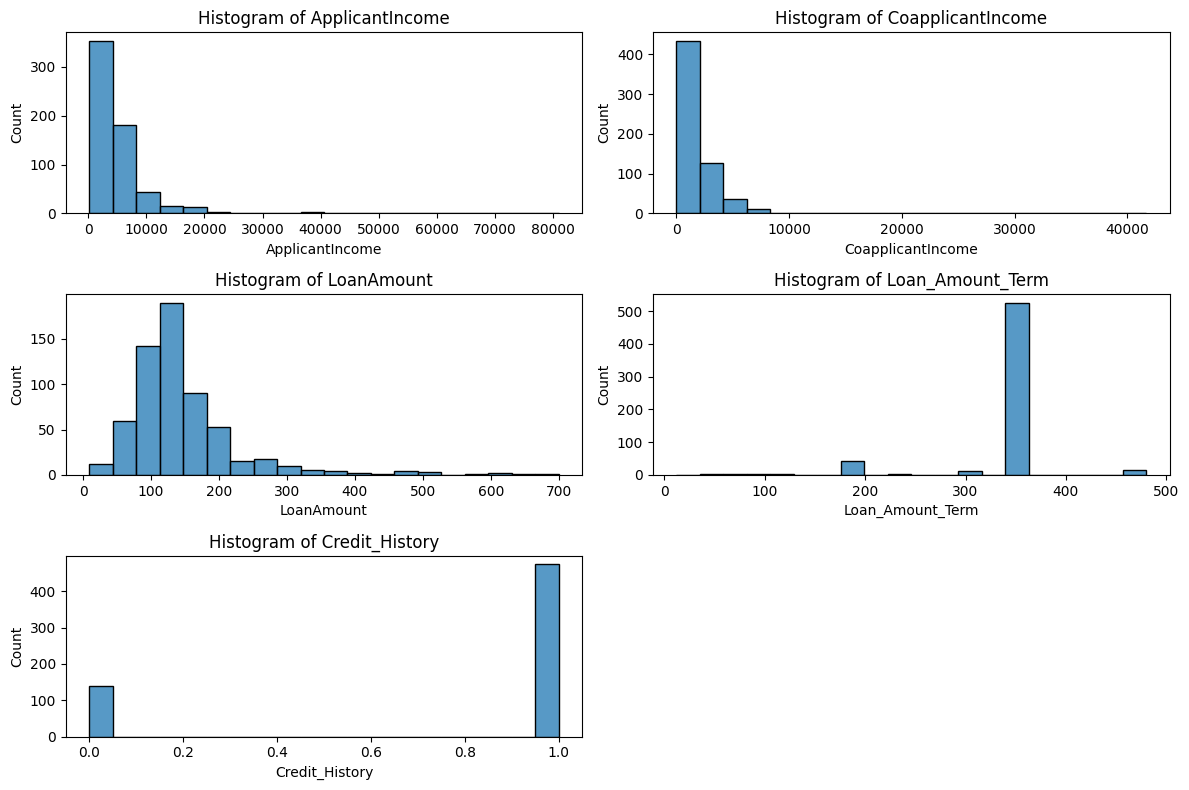

In [17]:
numeric_features = df.select_dtypes(include=['int64', 'float64'])
num_numeric_features = len(numeric_features.columns)
num_rows = num_numeric_features // 2 + num_numeric_features % 2
num_cols = 2

plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[column], bins=20)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


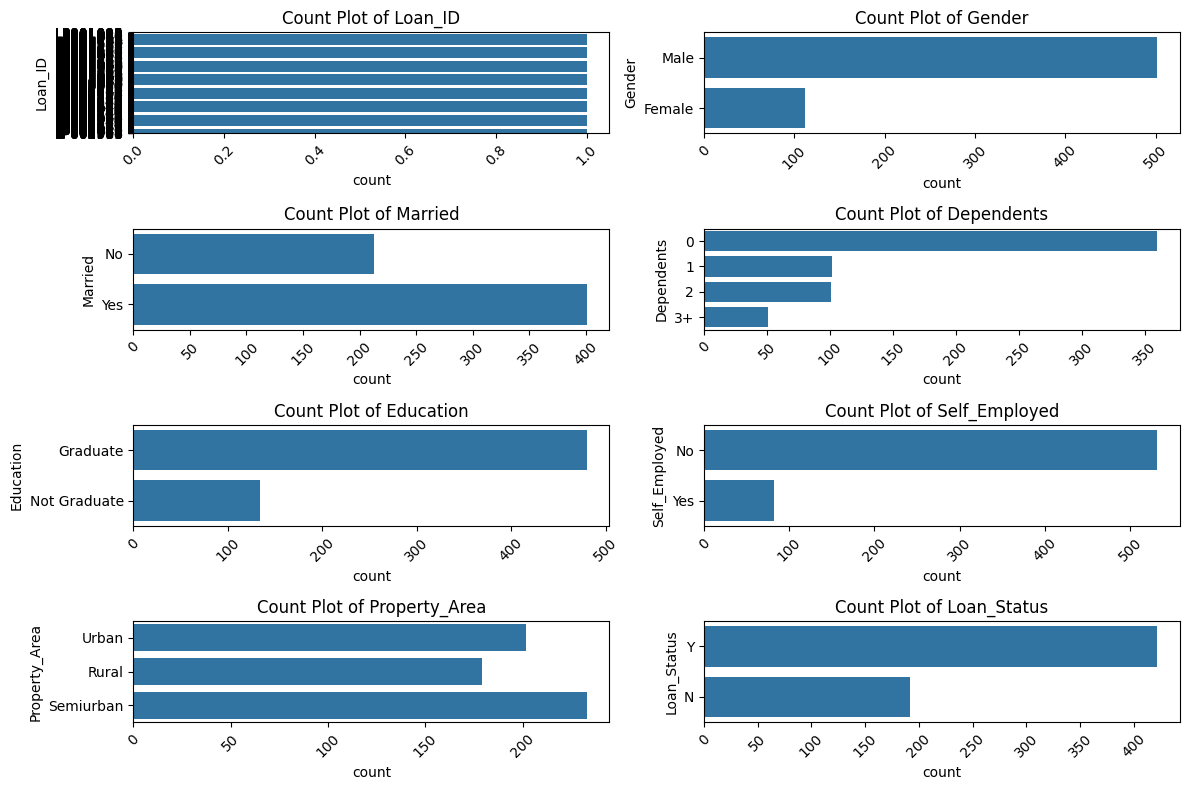

In [18]:
categorical_features = df.select_dtypes(include=['object'])
num_categorical_features = len(categorical_features.columns)
num_rows = num_categorical_features // 2 + num_categorical_features % 2
num_cols = 2

plt.figure(figsize=(12, 8))

for i, column in enumerate(categorical_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(df[column])
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


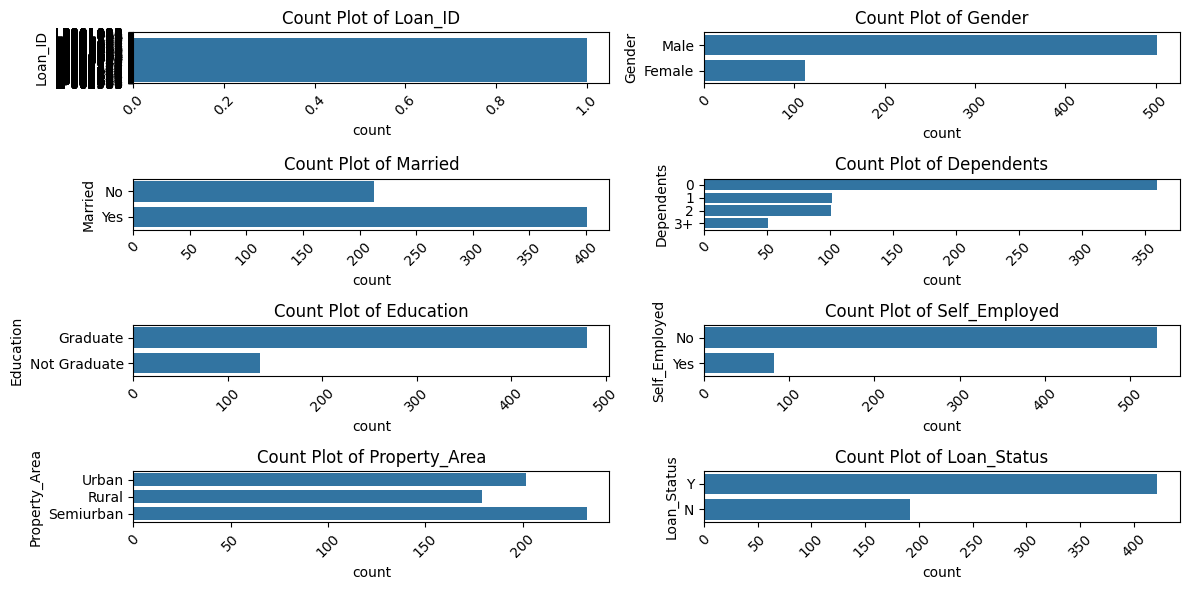

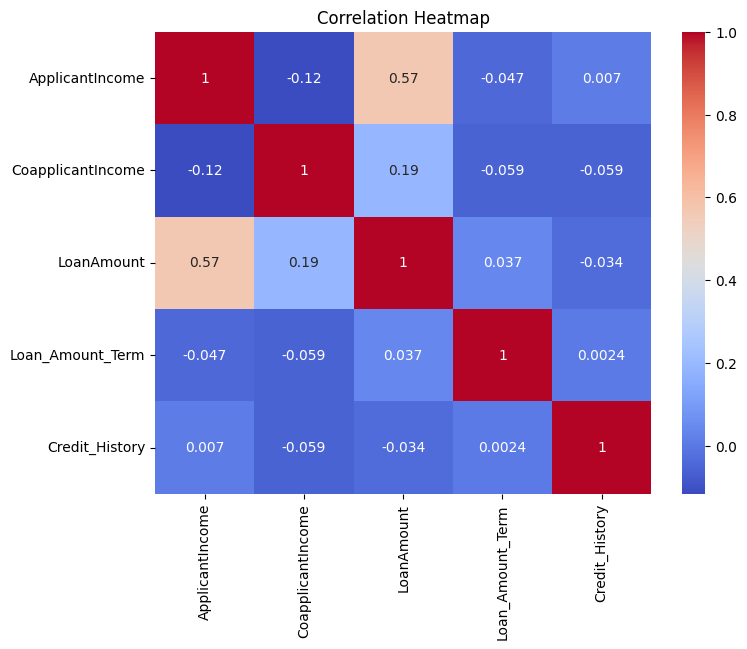

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object'])
num_categorical_features = len(categorical_features.columns)
num_rows = num_categorical_features // 2 + num_categorical_features % 2
num_cols = 2

plt.figure(figsize=(12, 6))

for i, column in enumerate(categorical_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(df[column])
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Correlation heatmap for numeric features (excluding non-numeric columns)
numeric_features = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



Model Building: The goal is to build predictive models, that can split data into training and testing sets and start building machine learning models 

##### Logistic Regression Model--------------------------------------------------------------------------

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split your data into features (X) and the target variable (Y)
X = df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]]
Y = df["Loan_Status"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create a Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_regression.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = logistic_regression.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_rep)

Accuracy: 0.7967479674796748
Classification Report:
              precision    recall  f1-score   support

           N       0.67      0.48      0.56        33
           Y       0.83      0.91      0.87        90

    accuracy                           0.80       123
   macro avg       0.75      0.70      0.71       123
weighted avg       0.78      0.80      0.79       123



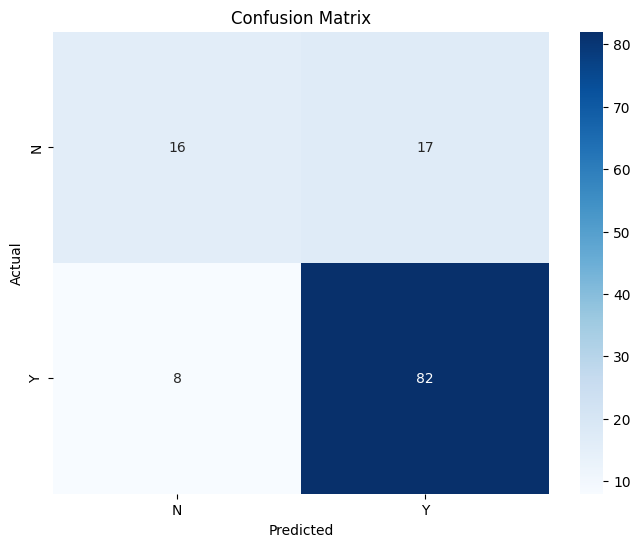

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["N", "Y"], yticklabels=["N", "Y"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
# Fit your model and obtain predicted probabilities
Y_pred_prob = logistic_regression.predict_proba(X_test)[:, 1]  # Assuming binary classification, use the probability of the positive class


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.preprocessing import LabelBinarizer

# Convert 'N' to 0 and 'Y' to 1
label_binarizer = LabelBinarizer()
Y_test_bin = label_binarizer.fit_transform(Y_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_bin, Y_pred_prob)



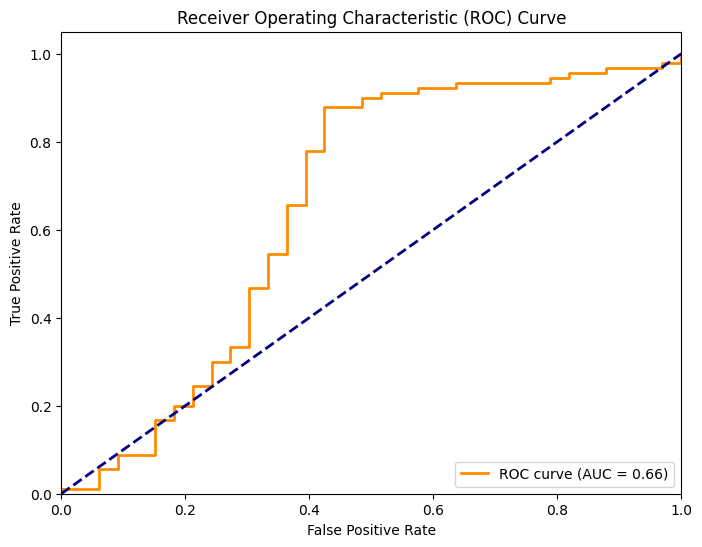

In [28]:
# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(Y_test_bin, Y_pred_prob)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


------------------------------------------------------------------------------------------

#### Gradient Boosting ---------------------------------------------

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split your data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create a Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Fit the model on the training data
gradient_boosting.fit(X_train, Y_train)


GradientBoostingClassifier(random_state=0)

In [30]:
# Make predictions on the test set
Y_pred = gradient_boosting.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)


In [31]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7560975609756098

Classification Report:
               precision    recall  f1-score   support

           N       0.58      0.33      0.42        33
           Y       0.79      0.91      0.85        90

    accuracy                           0.76       123
   macro avg       0.68      0.62      0.63       123
weighted avg       0.73      0.76      0.73       123



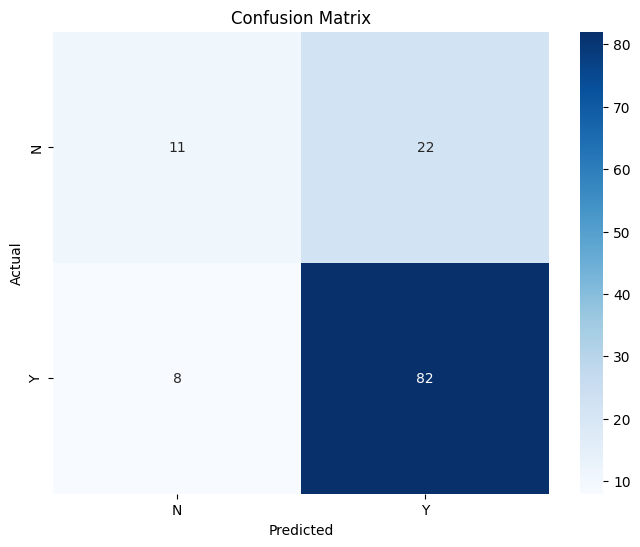

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["N", "Y"], yticklabels=["N", "Y"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

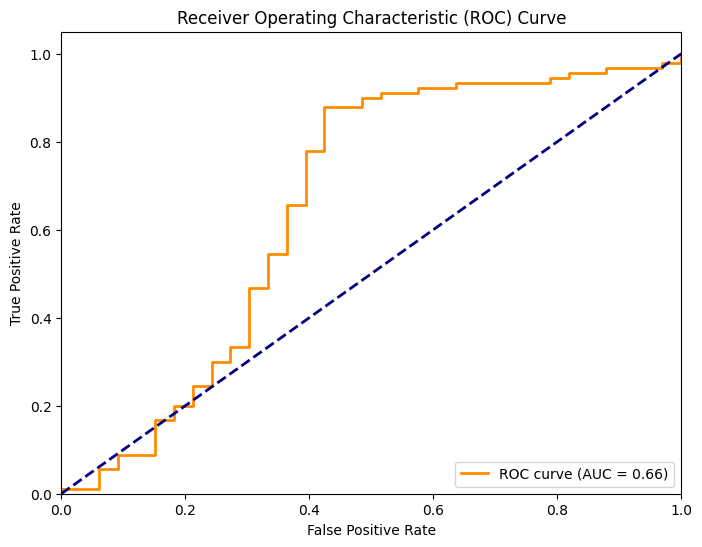

In [33]:

# Map 'N' and 'Y' to numerical values
Y_test_numeric = Y_test.map({'N': 0, 'Y': 1})

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_numeric, Y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(Y_test_numeric, Y_pred_prob)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


----------------------------------------------------------------------------